In [665]:
import numpy as np
import pandas as pd
import re

In [666]:
df = pd.read_csv('raw data/movies.csv')
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [667]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


# For Movie Table

In [668]:
def extract_years(text):
    if pd.isna(text):
        return pd.Series([np.nan, np.nan], index=['year_of_release', 'year_end_series'])
    years = re.findall(r'\d{4}', str(text))
    if len(years) >= 1:
        year_of_release = int(years[0])
    else:
        year_of_release = np.nan
    if len(years) >= 2:
        year_end_series = int(years[1])
    else:
        year_end_series = np.nan
    return pd.Series([year_of_release, year_end_series], index=['year_of_release', 'year_end_series'])


In [669]:
df[['year_of_release', 'year_end_series']] = df['YEAR'].apply(extract_years)

In [670]:
df['year_of_release'] = df['year_of_release'].astype('Int64')
df['year_end_series'] = df['year_end_series'].astype('Int64')

In [671]:
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,year_of_release,year_end_series
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN,2021,<NA>
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN,2021,<NA>
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN,2010,2022
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN,2013,<NA>
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN,2021,<NA>


In [672]:
df['is_tv_movie'] = df['YEAR'].str.contains('tv movie', case=False, na=False).astype(int)
df['is_tv_special'] = df['YEAR'].str.contains('tv special', case=False, na=False).astype(int)
df['is_tv_short'] = df['YEAR'].str.contains('tv short', case=False, na=False).astype(int)
df['is_video_game'] = df['YEAR'].str.contains('video game', case=False, na=False).astype(int)

In [673]:
df.rename(columns={'ONE-LINE': 'PLOT'}, inplace=True)

In [674]:
df['PLOT'] = df['PLOT'].str.replace('\n', '')
df['GENRE'] = df['GENRE'].str.replace('\n', '')
df['STARS'] = df['STARS'].str.replace('\n', '')

In [675]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MOVIES           9999 non-null   object 
 1   YEAR             9355 non-null   object 
 2   GENRE            9919 non-null   object 
 3   RATING           8179 non-null   float64
 4   PLOT             9999 non-null   object 
 5   STARS            9999 non-null   object 
 6   VOTES            8179 non-null   object 
 7   RunTime          7041 non-null   float64
 8   Gross            460 non-null    object 
 9   year_of_release  9251 non-null   Int64  
 10  year_end_series  1388 non-null   Int64  
 11  is_tv_movie      9999 non-null   int64  
 12  is_tv_special    9999 non-null   int64  
 13  is_tv_short      9999 non-null   int64  
 14  is_video_game    9999 non-null   int64  
dtypes: Int64(2), float64(2), int64(4), object(7)
memory usage: 1.2+ MB


In [676]:
df['is_tv_special'].value_counts()

is_tv_special
0    9602
1     397
Name: count, dtype: int64

In [677]:
df['year_of_release'].value_counts()

year_of_release
2020    1694
2019    1420
2021    1117
2018    1089
2017     843
        ... 
1981       1
1971       1
1941       1
1958       1
1938       1
Name: count, Length: 78, dtype: Int64

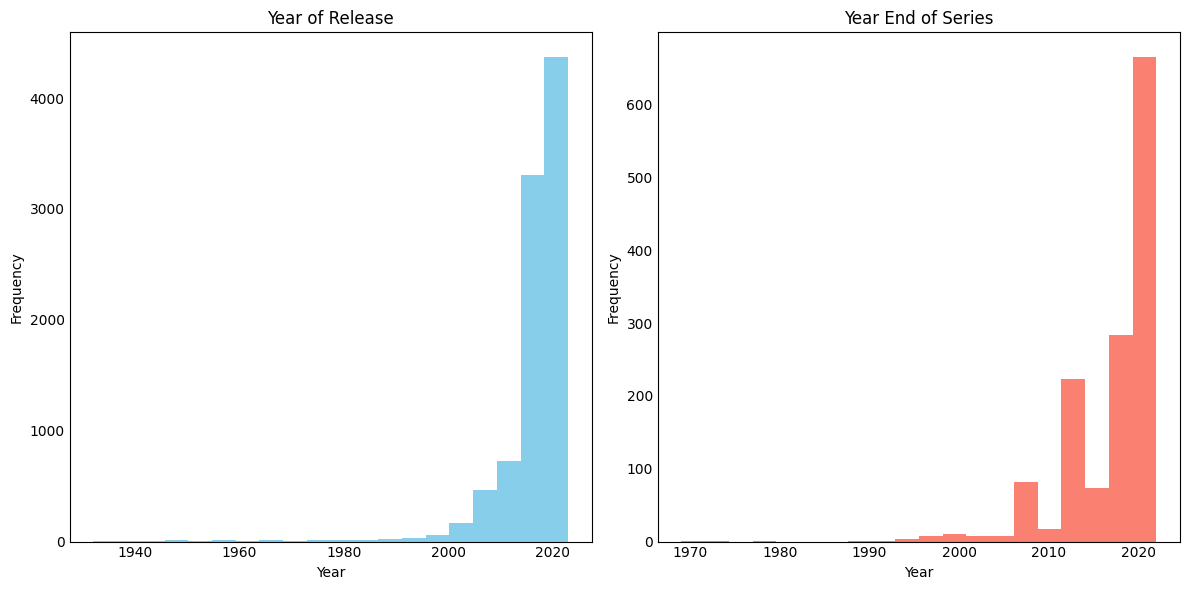

In [678]:
import matplotlib.pyplot as plt

# Create a figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the distribution of 'year_of_release'
axes[0].hist(df['year_of_release'].dropna(), bins=20, color='skyblue')
axes[0].set_title('Year of Release')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='both', which='both', length=0)  # Hide ticks
axes[0].grid(False)  # Hide gridlines

# Plot the distribution of 'year_end_series'
axes[1].hist(df['year_end_series'].dropna(), bins=20, color='salmon')
axes[1].set_title('Year End of Series')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='both', which='both', length=0)  # Hide ticks
axes[1].grid(False)  # Hide gridlines

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [679]:
# Copy df to 3 different df for other table processing
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()

In [680]:
df = df.drop(['GENRE', 'STARS', 'YEAR'], axis=1)

In [681]:
df.head()

,MOVIES,RATING,PLOT,VOTES,RunTime,Gross,year_of_release,year_end_series,is_tv_movie,is_tv_special,is_tv_short,is_video_game
0,Blood Red Sky,6.1,A woman with a mysterious illness is forced in...,"21,062",121.0,NaN,2021,<NA>,0,0,0,0
1,Masters of the Universe: Revelation,5.0,The war for Eternia begins again in what may b...,"17,870",25.0,NaN,2021,<NA>,0,0,0,0
2,The Walking Dead,8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"885,805",44.0,NaN,2010,2022,0,0,0,0
3,Rick and Morty,9.2,An animated series that follows the exploits o...,"414,849",23.0,NaN,2013,<NA>,0,0,0,0
4,Army of Thieves,NaN,"A prequel, set before the events of Army of th...",NaN,NaN,NaN,2021,<NA>,0,0,0,0


# For Movie Genre Table

In [682]:
df2.drop(df2.columns.difference(['MOVIES', 'GENRE']), axis=1, inplace=True)

In [683]:
df2.drop_duplicates(subset=['MOVIES', 'GENRE'], inplace=True)

In [684]:
df2['GENRE'] = df2['GENRE'].str.split(', ')
df2 = df2.explode('GENRE')

In [685]:
df2.head()

,MOVIES,GENRE
0,Blood Red Sky,Action
0,Blood Red Sky,Horror
0,Blood Red Sky,Thriller
1,Masters of the Universe: Revelation,Animation
1,Masters of the Universe: Revelation,Action


In [686]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14597 entries, 0 to 9996
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   MOVIES  14597 non-null  object
 1   GENRE   14519 non-null  object
dtypes: object(2)
memory usage: 342.1+ KB


# For Movie Directors Table

In [687]:
df3.drop(df3.columns.difference(['MOVIES', 'STARS']), axis=1, inplace=True)

In [688]:
df3[df3['STARS'].str.contains(r'\bdirector:\b', case=False, na=False)]

,MOVIES,STARS
0,Blood Red Sky,Director:Peter Thorwarth| Stars:Peri B...
4,Army of Thieves,Director:Matthias Schweighöfer| Stars:...
6,The Last Letter from Your Lover,Director:Augustine Frizzell| Stars:Sha...
10,Gunpowder Milkshake,Director:Navot Papushado| Stars:Karen ...
12,Fear Street: 1994,Director:Leigh Janiak| Stars:Kiana Mad...
...,...,...
9992,1899,Director:Baran bo Odar
9993,Totenfrau,Director:Nicolai Rohde| Stars:Felix Kl...
9996,Heart of Invictus,Director:Orlando von Einsiedel| Star:P...
9997,The Imperfects,Director:Jovanka Vuckovic| Stars:Morga...


In [689]:
df3[df3['STARS'].str.contains(r'\bdirectors:\b', case=False, na=False)]

,MOVIES,STARS
56,365 dni,"Directors:Barbara Bialowas, Tomasz Mandes|..."
73,A Classic Horror Story,"Directors:Roberto De Feo, Paolo Strippoli|..."
83,Trollhunters: Rise of the Titans,"Directors:Johane Matte, Francisco Ruiz-Vel..."
167,The Mitchells vs the Machines,"Directors:Michael Rianda, Jeff Rowe| S..."
202,Things Heard & Seen,"Directors:Shari Springer Berman, Robert Pu..."
...,...,...
9858,Surviving Summer,"Directors:Ben Chessell, Charlotte George| ..."
9881,Fatma,"Directors:Ozer Feyzioglu, Ozgur Onurme| ..."
9882,Fatma,"Directors:Ozer Feyzioglu, Ozgur Onurme| ..."
9920,Girl From Nowhere,"Directors:Paween Purijitpanya, Surawut Tun..."


In [690]:
def extract_director(director):
    if "Directors:" in director:
        director_str = director.split("Directors:")[1].split("|")[0].strip()
        director_list = [star.strip().replace('[', '').replace(']', '') for star in director_str.split(",")]
        return director_list
    elif "Director:" in director:
        director_str = director.split("Director:")[1].split("|")[0].strip()
        director_list = [star.strip().replace('[', '').replace(']', '') for star in director_str.split(",")]
        return director_list
    else:
        return np.nan

df3['DIRECTOR'] = df3['STARS'].apply(extract_director)
df3 = df3.explode('DIRECTOR')

df3.head()

,MOVIES,STARS,DIRECTOR
0,Blood Red Sky,Director:Peter Thorwarth| Stars:Peri B...,Peter Thorwarth
1,Masters of the Universe: Revelation,"Stars:Chris Wood, Sarah Michel...",NaN
2,The Walking Dead,"Stars:Andrew Lincoln, Norman R...",NaN
3,Rick and Morty,"Stars:Justin Roiland, Chris Pa...",NaN
4,Army of Thieves,Director:Matthias Schweighöfer| Stars:...,Matthias Schweighöfer


In [691]:
df3[df3['MOVIES'] == 'Blood Red Sky']

,MOVIES,STARS,DIRECTOR
0,Blood Red Sky,Director:Peter Thorwarth| Stars:Peri B...,Peter Thorwarth


In [692]:
df3[df3['MOVIES'] == '365 dni']

,MOVIES,STARS,DIRECTOR
56,365 dni,"Directors:Barbara Bialowas, Tomasz Mandes|...",Barbara Bialowas
56,365 dni,"Directors:Barbara Bialowas, Tomasz Mandes|...",Tomasz Mandes


In [693]:
df3 = df3.drop(['STARS'], axis=1)

In [694]:
df3.drop_duplicates(inplace=True)

In [695]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8138 entries, 0 to 9997
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MOVIES    8138 non-null   object
 1   DIRECTOR  5188 non-null   object
dtypes: object(2)
memory usage: 190.7+ KB


# For Movie Stars Table

In [696]:
df4.drop(df4.columns.difference(['MOVIES', 'STARS']), axis=1, inplace=True)

In [697]:
df4[df4['STARS'].str.contains(r'\bstar:\b', case=False, na=False)]

,MOVIES,STARS
235,Sexy Beasts,Star:Rob Delaney
1155,The Killer,Director:David Fincher| Star:Michael F...
1184,Our Planet,Star:David Attenborough
1466,Bo Burnham: Make Happy,"Directors:Bo Burnham, Christopher Storer| ..."
1527,Wednesday,Star:Jenna Ortega
...,...,...
9793,Magic for Humans by Mago Pop,Star:Antonio Díaz
9834,The Last Kingdom,Director:Andy Hay| Star:Alexander Dreymon
9845,Disparu à jamais,Director:Juan Carlos Medina| Star:Boje...
9879,Bee and PuppyCat,Star:Tommy Wiseau


In [698]:
df4[df4['STARS'].str.contains(r'\bstars:\b', case=False, na=False)]

,MOVIES,STARS
0,Blood Red Sky,Director:Peter Thorwarth| Stars:Peri B...
1,Masters of the Universe: Revelation,"Stars:Chris Wood, Sarah Michel..."
2,The Walking Dead,"Stars:Andrew Lincoln, Norman R..."
3,Rick and Morty,"Stars:Justin Roiland, Chris Pa..."
4,Army of Thieves,Director:Matthias Schweighöfer| Stars:...
...,...,...
9985,The Last Kingdom,Director:Paul Wilmshurst| Stars:Alexan...
9993,Totenfrau,Director:Nicolai Rohde| Stars:Felix Kl...
9994,The Imperfects,"Stars:Morgan Taylor Campbell, ..."
9997,The Imperfects,Director:Jovanka Vuckovic| Stars:Morga...


In [699]:
# def extract_stars(stars):
#     if "Director" in stars or "Directors" in stars:
#         if "Stars:" in stars:
#             stars_str = stars.split("Stars:")[1].split("|")[1].strip()
#             stars_list = [star.strip().replace('[', '').replace(']', '') for star in stars_str.split(",")]
#             return stars_list
#         elif "Star:" in stars:
#             stars_str = stars.split("Star:")[1].split("|")[1].strip()
#             stars_list = [star.strip().replace('[', '').replace(']', '') for star in stars_str.split(",")]
#             return stars_list
#     else:
#         if "Stars:" in stars:
#             stars_str = stars.split("Stars:")[1].strip()
#             stars_list = [star.strip().replace('[', '').replace(']', '') for star in stars_str.split(",")]
#             return stars_list
#         elif "Star:" in stars:
#             stars_str = stars.split("Star:")[1].strip()
#             stars_list = [star.strip().replace('[', '').replace(']', '') for star in stars_str.split(",")]
#             return stars_list
#     return np.nan

In [700]:
def extract_stars(stars):
    parts = stars.split("|")
    stars_list = []
    for part in parts:
        if "Stars:" in part:
            stars_str = part.split("Stars:")[1].strip()
            stars_list.extend([star.strip().replace('[', '').replace(']', '') for star in stars_str.split(",")])
        elif "Star:" in part:  # Check for 'Star:' data
            stars_str = part.split("Star:")[1].strip()
            stars_list.extend([star.strip().replace('[', '').replace(']', '') for star in stars_str.split(",")])
    if stars_list:
        return stars_list
    return np.nan

In [701]:
df4['STARS'] = df4['STARS'].apply(extract_stars)
df4 = df4.explode('STARS')

df4.head()

,MOVIES,STARS
0,Blood Red Sky,Peri Baumeister
0,Blood Red Sky,Carl Anton Koch
0,Blood Red Sky,Alexander Scheer
0,Blood Red Sky,Kais Setti
1,Masters of the Universe: Revelation,Chris Wood


In [702]:
df4[df4['MOVIES'] == 'Blood Red Sky']

,MOVIES,STARS
0,Blood Red Sky,Peri Baumeister
0,Blood Red Sky,Carl Anton Koch
0,Blood Red Sky,Alexander Scheer
0,Blood Red Sky,Kais Setti


In [703]:
df4[df4['MOVIES'] == 'Sexy Beasts']

,MOVIES,STARS
235,Sexy Beasts,Rob Delaney
1451,Sexy Beasts,Rob Delaney
1451,Sexy Beasts,Dan Frigolette
1451,Sexy Beasts,Belindah Chaka
1451,Sexy Beasts,Sara Rosenberg


In [704]:
df4.drop_duplicates(inplace=True)

In [705]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25218 entries, 0 to 9998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   MOVIES  25218 non-null  object
 1   STARS   24659 non-null  object
dtypes: object(2)
memory usage: 591.0+ KB


# Final Check

### Movie Table

In [706]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MOVIES           9999 non-null   object 
 1   RATING           8179 non-null   float64
 2   PLOT             9999 non-null   object 
 3   VOTES            8179 non-null   object 
 4   RunTime          7041 non-null   float64
 5   Gross            460 non-null    object 
 6   year_of_release  9251 non-null   Int64  
 7   year_end_series  1388 non-null   Int64  
 8   is_tv_movie      9999 non-null   int64  
 9   is_tv_special    9999 non-null   int64  
 10  is_tv_short      9999 non-null   int64  
 11  is_video_game    9999 non-null   int64  
dtypes: Int64(2), float64(2), int64(4), object(4)
memory usage: 957.1+ KB


In [707]:
df.head()

,MOVIES,RATING,PLOT,VOTES,RunTime,Gross,year_of_release,year_end_series,is_tv_movie,is_tv_special,is_tv_short,is_video_game
0,Blood Red Sky,6.1,A woman with a mysterious illness is forced in...,"21,062",121.0,NaN,2021,<NA>,0,0,0,0
1,Masters of the Universe: Revelation,5.0,The war for Eternia begins again in what may b...,"17,870",25.0,NaN,2021,<NA>,0,0,0,0
2,The Walking Dead,8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"885,805",44.0,NaN,2010,2022,0,0,0,0
3,Rick and Morty,9.2,An animated series that follows the exploits o...,"414,849",23.0,NaN,2013,<NA>,0,0,0,0
4,Army of Thieves,NaN,"A prequel, set before the events of Army of th...",NaN,NaN,NaN,2021,<NA>,0,0,0,0


### Movie Genre Table

In [708]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14597 entries, 0 to 9996
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   MOVIES  14597 non-null  object
 1   GENRE   14519 non-null  object
dtypes: object(2)
memory usage: 342.1+ KB


In [709]:
df2.head()

,MOVIES,GENRE
0,Blood Red Sky,Action
0,Blood Red Sky,Horror
0,Blood Red Sky,Thriller
1,Masters of the Universe: Revelation,Animation
1,Masters of the Universe: Revelation,Action


### Movie Directors Table

In [710]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8138 entries, 0 to 9997
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MOVIES    8138 non-null   object
 1   DIRECTOR  5188 non-null   object
dtypes: object(2)
memory usage: 190.7+ KB


In [711]:
df3.head()

,MOVIES,DIRECTOR
0,Blood Red Sky,Peter Thorwarth
1,Masters of the Universe: Revelation,NaN
2,The Walking Dead,NaN
3,Rick and Morty,NaN
4,Army of Thieves,Matthias Schweighöfer


### Movie Stars Table

In [712]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25218 entries, 0 to 9998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   MOVIES  25218 non-null  object
 1   STARS   24659 non-null  object
dtypes: object(2)
memory usage: 591.0+ KB


In [713]:
df4.head()

,MOVIES,STARS
0,Blood Red Sky,Peri Baumeister
0,Blood Red Sky,Carl Anton Koch
0,Blood Red Sky,Alexander Scheer
0,Blood Red Sky,Kais Setti
1,Masters of the Universe: Revelation,Chris Wood


# To CSV

In [714]:
df.to_csv('processed data/movies.csv')
df2.to_csv('processed data/movies_genre.csv')
df3.to_csv('processed data/movies_directors.csv')
df4.to_csv('processed data/movies_stars.csv')